In [56]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np
from scipy.interpolate import griddata

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

## 1.1 读取多个时次的模式预报数据 TEMP

In [58]:
%time
directory850 = "ECMWF_HR/TMP/850"
directorySeaLevel = "ECMWF_HR/PRMSL"
fhours = np.arange(0, 120, 12)
filenames = ['22062420.'+'%03d'%(fhour) for fhour in fhours]
T850 = get_model_grids(directory850, filenames, varname='TMP', varattrs={'long_name':'850hPa T', 'units':'C'}, cache=False)
HSeaLevel = get_model_grids(directorySeaLevel, filenames, varname='PRMSL', varattrs={'long_name':'Sea Level Pressure', 'units':'hPa'}, cache=False)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs


In [59]:
HSeaLevel

<xarray.Dataset>
Dimensions:                  (time: 10, lat: 721, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
  * lat                      (lat) float64 -10.0 -9.875 -9.75 ... 79.88 80.0
  * lon                      (lon) float64 0.0 0.125 0.25 ... 179.8 179.9 180.0
    forecast_reference_time  datetime64[ns] 2022-06-24T20:00:00
    forecast_period          (time) float64 0.0 12.0 24.0 ... 84.0 96.0 108.0
Data variables:
    PRMSL                    (time, lat, lon) float32 1.016e+03 ... 990.3
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

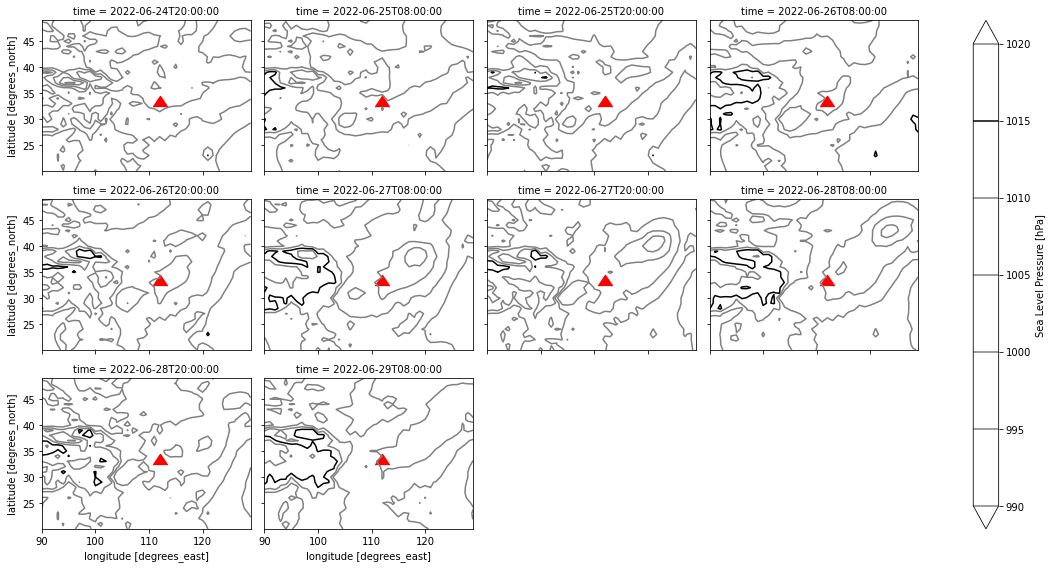

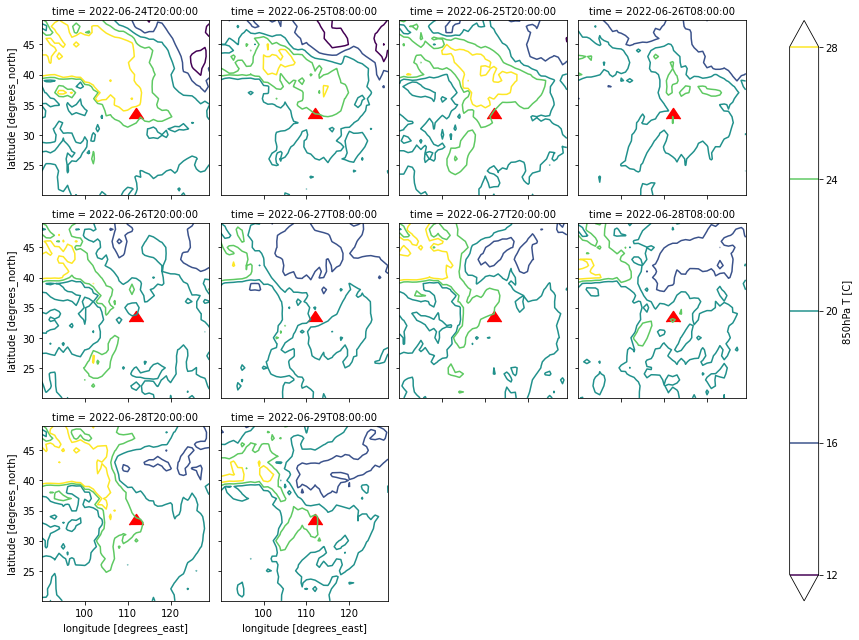

In [60]:
# 绘制图像
left = 90
right=130
top = 50
bottom = 20

lon=np.arange(left,right,1)
lat=np.arange(bottom,top,1)

T850Area = T850.TMP.isel(level=0).sel(lon=lon,lat=lat, method="nearest")
HSeaLevelArea = HSeaLevel.PRMSL.sel(lon=lon,lat=lat, method="nearest")

HSeaLevelcolors = ['gray']*10
HSeaLevelcolors[-3] = HSeaLevelcolors[-5] = 'black'

p = HSeaLevelArea.plot.contour(figsize=(16, 8), col='time', col_wrap=4, levels=np.arange(990,1025,5), colors = HSeaLevelcolors, add_colorbar=True) #[24, 28]

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)


p = T850Area.plot.contour(col='time', col_wrap=4, levels=[12, 16, 20, 24, 28],add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

## 1.2 Draw Surface Plot

In [61]:
""" 
SURFACE/PLOT_GLOBAL_1H
SURFACE/PLOT_GLOBAL_3H
mdfs:///SURFACE/PLOT_GLOBAL_ALL_1H/20220625130000.000
mdfs:///SURFACE/PLOT_GLOBAL_ALL_3H/20220625130000.000 
mdfs:///SURFACE/PLOT_NATIONAL_1H/20220625130000.000
mdfs:///SURFACE/PLOT_NATIONAL/20220625130000.000

"""
plotSurface = get_station_data("SURFACE/PLOT_GLOBAL_ALL_1H", "20220625080000.000", dropna=True, cache=False)
plotSurface

,ID,lon,lat,Weather_current,Dewpoint,Alt,Weather_past_1,Grade,Weather_past_2,Wind_angle_2m_avg,...,Middle_cloud,High_cloud,Low_cloud_cover,Cloud_base_hight,Low_cloud,Pressure_24h_trend,Rain_6h,Rain_3h,Temp_24h_trend,time
0,1000015,136.149994,57.650002,2.0,14.000000,318.000000,1.0,15,1.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-25 08:00:00
1,1000014,113.970001,70.129997,2.0,15.800000,61.000000,1.0,15,1.0,0.0,...,23.0,15.0,4.0,3500.0,30.0,NaN,NaN,NaN,NaN,2022-06-25 08:00:00
2,1000013,-169.830002,66.150002,102.0,NaN,7.000000,11.0,15,11.0,230.0,...,21.0,14.0,1.0,250.0,39.0,NaN,NaN,NaN,NaN,2022-06-25 08:00:00
3,1000012,70.919998,26.900000,2.0,18.200001,257.000000,1.0,15,1.0,230.0,...,NaN,NaN,NaN,NaN,NaN,-49.0,NaN,NaN,NaN,2022-06-25 08:00:00
4,1000011,-152.899994,45.099998,NaN,9.200000,NaN,2.0,15,2.0,360.0,...,27.0,17.0,9.0,250.0,36.0,NaN,NaN,NaN,NaN,2022-06-25 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,59948,109.589996,18.230000,21.0,24.500000,419.399994,0.0,15,0.0,161.0,...,NaN,NaN,NaN,NaN,NaN,-7.0,0.1,0.1,-0.6,2022-06-25 08:00:00
8883,59951,110.330002,18.799999,0.0,25.500000,40.400002,0.0,15,0.0,215.0,...,NaN,NaN,NaN,NaN,NaN,-11.0,0.7,0.7,-1.0,2022-06-25 08:00:00
8884,59954,110.029999,18.549999,60.0,25.100000,35.200001,0.0,15,0.0,303.0,...,NaN,NaN,NaN,NaN,NaN,-6.0,11.0,10.0,-2.2,2022-06-25 08:00:00
8885,59981,112.330002,16.830000,0.0,24.400000,5.100000,0.0,15,0.0,184.0,...,NaN,NaN,NaN,NaN,NaN,-6.0,NaN,NaN,0.5,2022-06-25 08:00:00


In [62]:
plotSurface[0:1].to_json()

'{"ID":{"0":1000015},"lon":{"0":136.1499938965},"lat":{"0":57.6500015259},"Weather_current":{"0":2.0},"Dewpoint":{"0":14.0},"Alt":{"0":318.0},"Weather_past_1":{"0":1.0},"Grade":{"0":15},"Weather_past_2":{"0":1.0},"Wind_angle_2m_avg":{"0":90.0},"Sea_level_pressure":{"0":999.5999755859},"Wind_speed_2m_avg":{"0":1.0},"Pressure_3h_trend":{"0":0.0},"Name":{"0":"31152"},"Vis_manual":{"0":55.0},"Temp":{"0":22.3999996185},"Total_cloud_cover":{"0":0.0},"Middle_cloud":{"0":null},"High_cloud":{"0":null},"Low_cloud_cover":{"0":null},"Cloud_base_hight":{"0":null},"Low_cloud":{"0":null},"Pressure_24h_trend":{"0":null},"Rain_6h":{"0":null},"Rain_3h":{"0":null},"Temp_24h_trend":{"0":null},"time":{"0":1656144000000}}'

In [63]:
sea_level_pressure = plotSurface[['ID', 'lon', 'lat', 'Sea_level_pressure']]

In [64]:
SLP = sea_level_pressure.dropna(how='any')
SLP = SLP[(bottom <= SLP['lat']) & (SLP['lat'] <= top) &
            (left <= SLP['lon']) & (SLP['lon'] <= right)]

SLP

,ID,lon,lat,Sea_level_pressure
28,1000019,93.900002,24.770000,1004.000000
42,1000037,94.120003,27.230000,1003.000000
57,1000054,95.019997,27.480000,1003.599976
82,1000092,123.099998,26.500000,1011.000000
102,1000102,122.599998,22.799999,1010.000000
...,...,...,...,...
8861,59664,110.989998,21.549999,1008.200012
8862,59673,112.769997,21.740000,1008.099976
8863,59750,110.070000,20.959999,1007.799988
8864,59754,110.160004,20.240000,1007.900024


### Contour plot of irregularly spaced data
https://matplotlib.org/stable/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py

/tmp/ipykernel_3411/3735449924.py:7: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  cntr = ax.tricontour(SLP.lon, SLP.lat, SLP.Sea_level_pressure, levels=levels, add_colorbar=True)


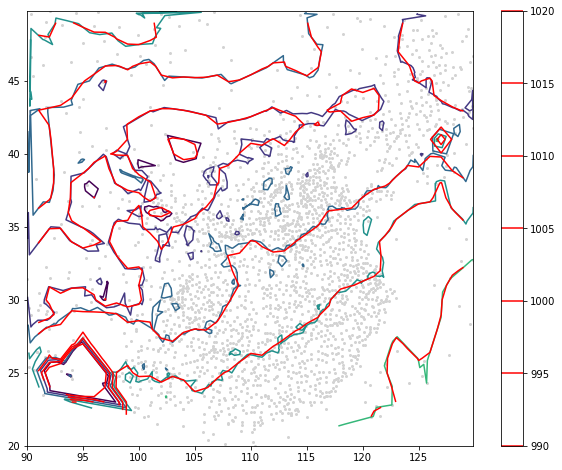

In [65]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

levels=np.arange(990,1025,5)

ax.plot(SLP.lon, SLP.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(SLP.lon, SLP.lat, SLP.Sea_level_pressure, levels=levels, add_colorbar=True)

#Interpolate the data to a regular grid first.
SLP_Grid = griddata((SLP.lon, SLP.lat), SLP.Sea_level_pressure, (lon[None, :], lat[:, None]), method='linear')
cntr = ax.contour(lon, lat, SLP_Grid, levels=levels, colors = 'red') #add_colorbar=True

fig.colorbar(cntr, ax=ax)

## 1.3 Draw SLP Diff

In [66]:
dti = pd.date_range("2022-06-24 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")

""" 
BEIJING_MR/HGT/500/22062420.000 
"ECMWF_HR/HGT/500"
GRAPES_GFS/HGT/500/22062420.000
"GERMAN_HR/GEOPOTENTIAL/500"
JAPAN_MR/HGT/500/22062420.000
NCEP_GFS_HR/HGT/500/22062408.000

SHANGHAI_MR/HGT/500/22062420.000
"""
directory500 = 'ECMWF_HR/PRMSL'
fhours = np.arange(12, 12*7, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, allExists=False, cache=False)

H500

2022-06-24 20:00:00    22062420.012
2022-06-24 08:00:00    22062408.024
2022-06-23 20:00:00    22062320.036
2022-06-23 08:00:00    22062308.048
2022-06-22 20:00:00    22062220.060
2022-06-22 08:00:00    22062208.072
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, lat: 721, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-25T08:00:00 ... 20...
  * lat                      (lat) float64 -10.0 -9.875 -9.75 ... 79.88 80.0
  * lon                      (lon) float64 0.0 0.125 0.25 ... 179.8 179.9 180.0
    forecast_reference_time  (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
    forecast_period          (time) float64 12.0 24.0 36.0 48.0 60.0 72.0
Data variables:
    hgt                      (time, lat, lon) float32 1.016e+03 ... 1.011e+03
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

6


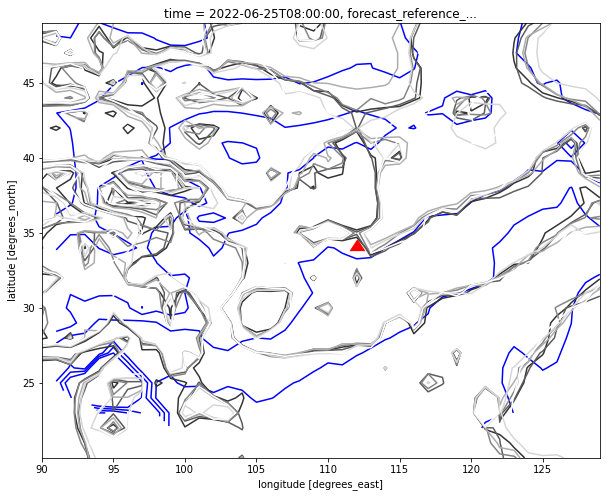

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))

SLP_Grid = griddata((SLP.lon, SLP.lat), SLP.Sea_level_pressure, (lon[None, :], lat[:, None]), method='linear')
cntr = ax.contour(lon, lat, SLP_Grid, levels=levels, colors = 'blue') #add_colorbar=True

#fig.colorbar(cntr, ax=ax)
ax.scatter(112, 34.5, s=200, c='red', marker=6)

H500Area = H500.hgt.sel(lon=lon,lat=lat, method="nearest")

print(H500Area.sizes['time'])
for index in range(0,H500Area.sizes['time']):
    colors = index/5 * (1-0.2) + 0.2
    H500Area.isel(time=index).plot.contour(ax = ax, levels=levels, colors = str(colors) )
    pass


In [68]:
#learn griddata

print((lon[None, :], lat[:, None]))

zi = griddata((SLP.lon, SLP.lat), SLP.Sea_level_pressure, (lon[None, :], lat[:, None]), method='linear')

zi

(array([[ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129]]), array([[20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49]]))


array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [          nan, 1003.22585485, 1003.8514133 , ...,  992.11496609,
         991.10820934,  991.1894648 ],
       [          nan, 1004.80214652, 1004.98439193, ...,  992.72251933,
         992.19582642,  991.96779082],
       [          nan, 1006.23632349, 1006.36076705, ...,  993.28183403,
         992.82434125,  992.9495369 ]])